In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sosososo2","key":"8db1400569a2653145182c2f923f1a3d"}'}

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!rm -rf test train valid train_s

In [4]:
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 80% 52.0M/65.2M [00:00<00:00, 193MB/s]
100% 65.2M/65.2M [00:00<00:00, 193MB/s]


In [5]:
!unzip emotion-detection-fer.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    
  inflating: t

In [6]:
import os

def count_files(base_dir):
    sum_count=0
    categories = os.listdir(base_dir)
    for category in categories:
        category_path = os.path.join(base_dir, category)
        if os.path.isdir(category_path):
            file_count = len(os.listdir(category_path))
            sum_count += file_count
            print(f"{base_dir}/{category}: {file_count}")
    print(f"\n총 데이터 수: {sum_count}")

In [7]:
count_files('train')

train/happy: 7215
train/sad: 4830
train/fearful: 4097
train/disgusted: 436
train/angry: 3995
train/neutral: 4965
train/surprised: 3171

총 데이터 수: 28709


In [8]:
count_files('test')

test/happy: 1774
test/sad: 1247
test/fearful: 1024
test/disgusted: 111
test/angry: 958
test/neutral: 1233
test/surprised: 831

총 데이터 수: 7178


In [9]:
import shutil
import random

source_dir = 'train_s'
train_dir = 'train'
valid_dir = 'valid'

def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def copy_files(file_list, src_dir, dst_dir):
    for file in file_list:
        shutil.copy(os.path.join(src_dir, file), dst_dir)

def rename_dir(old_name, new_name):
    if os.path.exists(old_name):
        try:
            os.rename(old_name, new_name)
            print(f"폴더 이름이 '{old_name}'에서 '{new_name}'으로 변경되었습니다.")
        except Exception as e:
            print(f"폴더 이름 변경 중 오류가 발생했습니다: {e}")
    else:
        print(f"'{old_name}' 폴더가 존재하지 않습니다.")

def delete_dir(folder_path):
    if os.path.exists(folder_path):
        try:
            shutil.rmtree(folder_path)
            print(f"폴더 '{folder_path}'가 성공적으로 삭제되었습니다.")
        except Exception as e:
            print(f"폴더 삭제 중 오류가 발생했습니다: {e}")
    else:
        print(f"폴더 '{folder_path}'가 존재하지 않습니다.")

rename_dir(train_dir, source_dir)
create_dir(train_dir)
create_dir(valid_dir)

categories = os.listdir(source_dir)

for category in categories:
    category_path = os.path.join(source_dir, category)

    if os.path.isdir(category_path):
        image_files = os.listdir(category_path)
        random.shuffle(image_files)

        # Train/Validation 비율 설정
        split_idx = int(0.7 * len(image_files))
        train_files = image_files[:split_idx]
        valid_files = image_files[split_idx:]

        # Train 디렉터리 생성 및 파일 복사
        train_category_dir = os.path.join(train_dir, category)
        create_dir(train_category_dir)
        copy_files(train_files, category_path, train_category_dir)

        # Validation 디렉터리 생성 및 파일 복사
        valid_category_dir = os.path.join(valid_dir, category)
        create_dir(valid_category_dir)
        copy_files(valid_files, category_path, valid_category_dir)
print("데이터를 성공적으로 Train과 Validation으로 나눴습니다.")
delete_dir('train_s')

폴더 이름이 'train'에서 'train_s'으로 변경되었습니다.
데이터를 성공적으로 Train과 Validation으로 나눴습니다.
폴더 'train_s'가 성공적으로 삭제되었습니다.


In [10]:
print(count_files('train'))
print()
print(count_files('valid'))
print()
print(count_files('test'))

train/happy: 5050
train/sad: 3381
train/fearful: 2867
train/disgusted: 305
train/angry: 2796
train/neutral: 3475
train/surprised: 2219

총 데이터 수: 20093
None

valid/happy: 2165
valid/sad: 1449
valid/fearful: 1230
valid/disgusted: 131
valid/angry: 1199
valid/neutral: 1490
valid/surprised: 952

총 데이터 수: 8616
None

test/happy: 1774
test/sad: 1247
test/fearful: 1024
test/disgusted: 111
test/angry: 958
test/neutral: 1233
test/surprised: 831

총 데이터 수: 7178
None


In [11]:
import os
import pandas as pd
import cv2

def create_image_df(directory):
    image_paths = []
    categories = []
    image_size = []

    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)

        if os.path.isdir(category_path):
            for image_file in os.listdir(category_path):
                image_path = os.path.join(category_path, image_file)
                image_paths.append(image_path)
                categories.append(category)

                try:
                    img = cv2.imread(image_path)
                    if img is not None:
                        height, width = img.shape[:2]
                        image_size.append((height, width))
                    else:
                        image_size.append((None, None))
                except Exception as e:
                    print(f"Error reading {image_path}: {e}")
                    image_size.append((None, None))

    data = pd.DataFrame({
        'image_paths': image_paths,
        'categories': categories,
        'image_size': image_size
    })
    return data

In [12]:
test_dir = 'test'

train_data=create_image_df(train_dir)
valid_data=create_image_df(valid_dir)
test_data=create_image_df(test_dir)

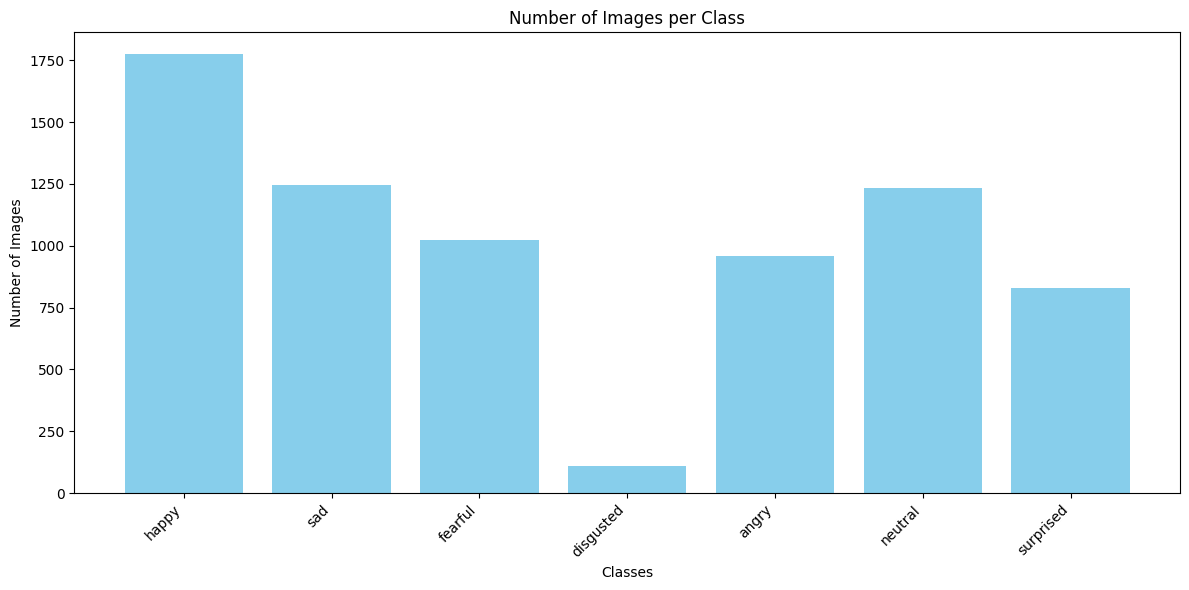

In [13]:
import os
import matplotlib.pyplot as plt

def count_images_in_directory(directory):
    class_counts = {}

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            image_count = len([file for file in os.listdir(class_path) if file.endswith(('jpg', 'png', 'jpeg'))])
            class_counts[class_name] = image_count
    return class_counts

def plot_image_counts(counts):
    classes = list(counts.keys())
    counts = list(counts.values())

    plt.figure(figsize=(12, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Class')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

counts = count_images_in_directory('test')
plot_image_counts(counts)

In [141]:
import os
import cv2
from torch.utils.data import Dataset
# from albumentations import ReplayCompose
class CustomDataset(Dataset):
    def __init__(self, data_dir, class_augmentations, default_augmentations, general_augmentations=None):
        self.data_dir = data_dir
        self.class_augmentations = class_augmentations
        self.default_augmentations = default_augmentations
        self.general_augmentations = general_augmentations
        self.image_paths = []
        self.labels = []
        self.disgusted_indices = []

        # 카테고리별 레이블 생성
        self.category_to_label = {category: idx for idx, category in enumerate(os.listdir(data_dir))}
        for category, label in self.category_to_label.items():
            category_path = os.path.join(data_dir, category)
            if os.path.isdir(category_path):
                for img_file in os.listdir(category_path):
                    self.image_paths.append(os.path.join(category_path, img_file))
                    self.labels.append(label)
                    if category == "disgusted":
                        self.disgusted_indices.append(len(self.image_paths) - 1)  # disgusted 데이터의 인덱스 저장

    def __len__(self):
        # disgusted 데이터를 여러 번 중복 반환해 데이터 비율을 높임
        return len(self.image_paths) + len(self.disgusted_indices) * 2

    def __getitem__(self, idx):
        if idx < len(self.image_paths):
            # 일반 데이터 반환
            img_path = self.image_paths[idx]
            label = self.labels[idx]
            category = list(self.category_to_label.keys())[label]
        else:
            # disgusted 데이터를 중복 반환
            disgusted_idx = self.disgusted_indices[(idx - len(self.image_paths)) % len(self.disgusted_indices)]
            img_path = self.image_paths[disgusted_idx]
            label = self.labels[disgusted_idx]
            category = "disgusted"

        # 이미지 읽기 (Grayscale 지원)
        image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        if image is None:
            raise ValueError(f"이미지 파일을 읽을 수 없습니다: {img_path}")

        # Grayscale(1채널)인 경우 처리
        if len(image.shape) == 2:
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        # 증강 적용
        if category in self.class_augmentations:
            augmentations = self.class_augmentations[category]
        else:
            augmentations = self.general_augmentations if self.general_augmentations else self.default_augmentations

        augmented = augmentations(image=image)
        image = augmented['image']

        # 텐서 변환
        image = image.float()
        return image, label

In [142]:
# import torch
# torch.cuda.empty_cache()

In [143]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
# disgusted 클래스 전용 증강
disgusted_augmentations = A.Compose([
    # A.HorizontalFlip(p=0.5),
    # A.RandomGamma(p=0.2),
    A.Rotate(limit=30, p=0.3),
    # A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    A.Resize(224, 224),
    ToTensorV2()
])

# 모든 train 데이터에 적용할 기본 증강
general_augmentations = A.Compose([
    # A.HorizontalFlip(p=0.3),
    # A.RandomBrightnessContrast(p=0.3),
    # A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    A.Resize(224, 224),
    ToTensorV2()
])

# Default augmentations for validation/test (No augmentation, only normalization and resizing)
default_augmentations = A.Compose([
    A.Resize(224, 224),
    # A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

class_augmentations = {
    "disgusted": disgusted_augmentations,
}


In [144]:
train_dir = 'train'
valid_dir = 'valid'
test_dir = 'test'

train_dataset = CustomDataset(
    data_dir=train_dir,
    class_augmentations=class_augmentations,
    default_augmentations=default_augmentations,
    general_augmentations=general_augmentations
)

valid_dataset = CustomDataset(
    data_dir=valid_dir,
    class_augmentations={},
    default_augmentations=default_augmentations
)

test_dataset = CustomDataset(
    data_dir=test_dir,
    class_augmentations={},
    default_augmentations=default_augmentations
)


In [145]:
from collections import Counter
from torch.utils.data import WeightedRandomSampler, DataLoader

# train_dataset의 레이블 분포 계산
class_counts = Counter(train_dataset.labels)
print(f"Class counts: {class_counts}")

# 클래스별 가중치 계산
total_samples = sum(class_counts.values())
class_weights = {cls: total_samples / count for cls, count in class_counts.items()}
print(f"Class weights: {class_weights}")

# 샘플별 가중치 생성
sample_weights = [class_weights[label] for label in train_dataset.labels]

# WeightedRandomSampler 생성
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

Class counts: Counter({0: 5050, 5: 3475, 1: 3381, 2: 2867, 4: 2796, 6: 2219, 3: 305})
Class weights: {0: 3.978811881188119, 1: 5.942916296953564, 2: 7.008371119637252, 3: 65.87868852459016, 4: 7.186337625178827, 5: 5.782158273381295, 6: 9.054979720594863}


In [151]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

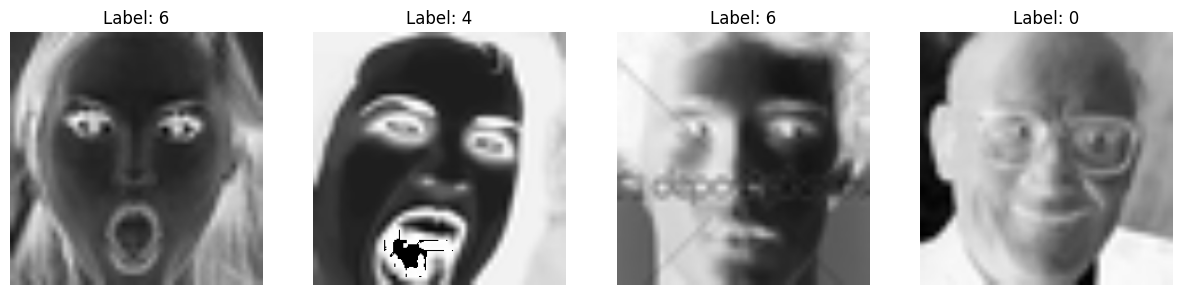

In [147]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, ax in enumerate(axes):
    img = F.to_pil_image(images[i])
    ax.imshow(img)
    ax.set_title(f"Label: {labels[i]}")
    ax.axis("off")
plt.show()

In [148]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0.0, path='best_model.pth'):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model, self.path)
        print(f"Validation loss가 개선되었음. {self.path}로 모델 저장")

In [137]:
!pip install efficientnet_pytorch
!pip install torch

In [152]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from efficientnet_pytorch import EfficientNet
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class_count = len(train_dataset.category_to_label)
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=class_count, dropout_rate=0.5).to(device) #추가
optimizer = optim.Adamax(model.parameters(), lr=0.001, weight_decay=1e-4) #추가
criterion = nn.CrossEntropyLoss()
early_stopping = EarlyStopping(patience=5, path='best_model.pth')

Loaded pretrained weights for efficientnet-b0


In [80]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [139]:
train_class_counts = Counter(train_dataset.labels)
valid_class_counts = Counter(valid_dataset.labels)

print(f"Train class distribution: {train_class_counts}")
print(f"Validation class distribution: {valid_class_counts}")

Train class distribution: Counter({0: 5050, 5: 3475, 1: 3381, 2: 2867, 4: 2796, 6: 2219, 3: 305})
Validation class distribution: Counter({0: 2165, 5: 1490, 1: 1449, 2: 1230, 4: 1199, 6: 952, 3: 131})


In [140]:
# best model로 돌릴경우
model = torch.load("best_model.pth")

<ipython-input-140-2472b2cedc00>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("best_model.pth")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 손실과 정확도를 추적할 리스트
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# F1-Score를 저장하기 위한 리스트
train_f1_scores = []
val_f1_scores = []

# 학습 루프
num_epochs = 20
epoch_count = 0
for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Training Loop
    all_train_preds = []
    all_train_labels = []
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # 기울기 초기화

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()  # 기울기 계산
        optimizer.step()  # 파라미터 업데이트

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_predictions += torch.sum(preds == labels)
        total_predictions += labels.size(0)

        # 예측 값과 실제 레이블 수집
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())
        epoch_count += 1

    # 훈련 손실과 정확도 계산
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_predictions.double() / total_predictions

    # Train F1-Score 계산
    train_classification_report = classification_report(
        all_train_labels, all_train_preds, target_names=list(train_dataset.category_to_label.keys()), output_dict=True, zero_division=1
    )
    train_f1 = train_classification_report['weighted avg']['f1-score']

    # 검증 Loop
    model.eval()  # 모델을 평가 모드로 설정
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    all_val_preds = []
    all_val_labels = []
    with torch.no_grad():  # 검증 단계에서는 기울기 계산이 필요 없음
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels)
            total_predictions += labels.size(0)

            # 예측 값과 실제 레이블 수집
            all_val_preds.extend(preds.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())

    # 검증 손실과 정확도 계산
    val_loss = val_loss / len(valid_loader)
    val_accuracy = correct_predictions.double() / total_predictions

    # Validation F1-Score 계산
    val_classification_report = classification_report(
        all_val_labels, all_val_preds, target_names=list(train_dataset.category_to_label.keys()), output_dict=True, zero_division=1
    )
    val_f1 = val_classification_report['weighted avg']['f1-score']

    # 에포크별 결과 출력
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Train F1-Score: {train_f1:.4f}")
    print(f"Epoch [{epoch+1}/{num_epochs}] - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Validation F1-Score: {val_f1:.4f}")

    # 손실, 정확도 및 F1-Score 저장
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

    # Early Stopping 처리
    scheduler.step(val_loss)
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping triggered. Training terminated.")
        break

Epoch 1/20: 100%|██████████| 162/162 [02:24<00:00,  1.12batch/s]


Epoch [1/20] - Train Loss: 1.2379, Train Accuracy: 0.5322, Train F1-Score: 0.5198
Epoch [1/20] - Validation Loss: 1.2180, Validation Accuracy: 0.5422, Validation F1-Score: 0.5030
Validation loss가 개선되었음. best_model.pth로 모델 저장


Epoch 2/20: 100%|██████████| 162/162 [02:24<00:00,  1.12batch/s]


Epoch [2/20] - Train Loss: 0.8560, Train Accuracy: 0.6810, Train F1-Score: 0.6769
Epoch [2/20] - Validation Loss: 1.0366, Validation Accuracy: 0.6292, Validation F1-Score: 0.6166
Validation loss가 개선되었음. best_model.pth로 모델 저장


Epoch 3/20: 100%|██████████| 162/162 [02:24<00:00,  1.12batch/s]


Epoch [3/20] - Train Loss: 0.6459, Train Accuracy: 0.7639, Train F1-Score: 0.7617
Epoch [3/20] - Validation Loss: 1.1454, Validation Accuracy: 0.5971, Validation F1-Score: 0.5979


Epoch 4/20: 100%|██████████| 162/162 [02:23<00:00,  1.13batch/s]


Epoch [4/20] - Train Loss: 0.4551, Train Accuracy: 0.8395, Train F1-Score: 0.8387
Epoch [4/20] - Validation Loss: 1.1630, Validation Accuracy: 0.6474, Validation F1-Score: 0.6449


Epoch 5/20:  85%|████████▍ | 137/162 [02:01<00:22,  1.12batch/s]

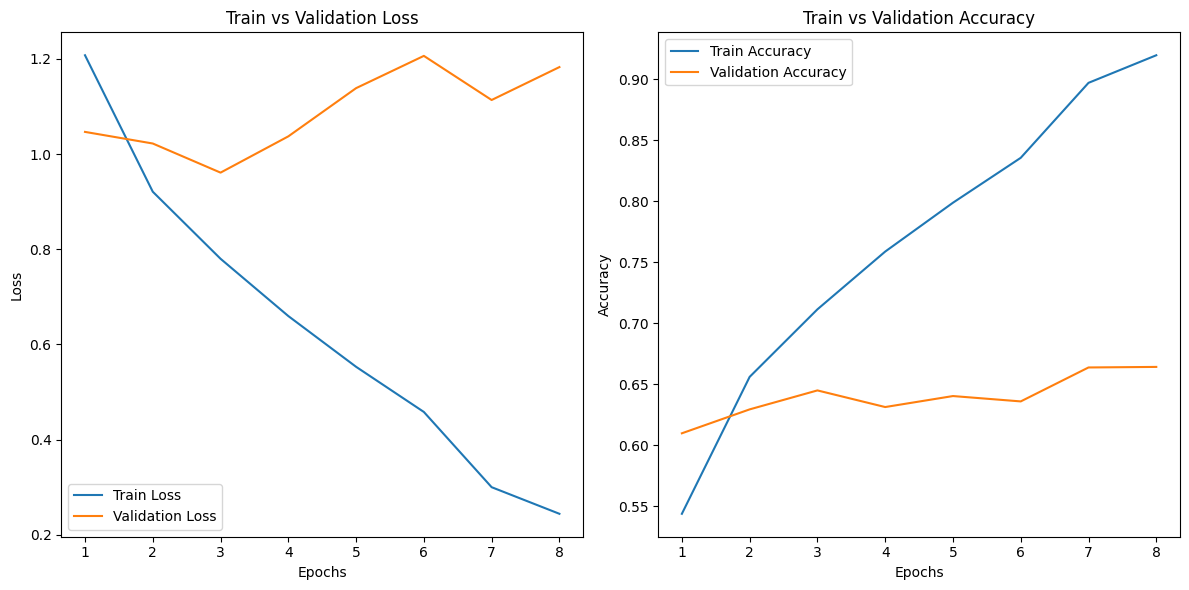

In [44]:
import matplotlib.pyplot as plt

# 텐서가 GPU에 있을 경우 CPU로 이동
train_losses = [loss.cpu().item() if torch.is_tensor(loss) else loss for loss in train_losses]
val_losses = [loss.cpu().item() if torch.is_tensor(loss) else loss for loss in val_losses]
train_accuracies = [acc.cpu().item() if torch.is_tensor(acc) else acc for acc in train_accuracies]
val_accuracies = [acc.cpu().item() if torch.is_tensor(acc) else acc for acc in val_accuracies]

# 에포크 수가 모든 데이터 리스트의 길이와 맞는지 확인
epoch_count = min(len(train_losses), len(val_losses), len(train_accuracies), len(val_accuracies))

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 훈련 손실과 검증 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(range(1, epoch_count + 1), train_losses[:epoch_count], label='Train Loss')
plt.plot(range(1, epoch_count + 1), val_losses[:epoch_count], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

# 훈련 정확도와 검증 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(range(1, epoch_count + 1), train_accuracies[:epoch_count], label='Train Accuracy')
plt.plot(range(1, epoch_count + 1), val_accuracies[:epoch_count], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
model = torch.load("best_model.pth")
model.eval()

# test_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

# 예측 결과 출력
with torch.no_grad():
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # GPU로 데이터 이동

        # 모델 예측
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()  # 손실 누적

        _, preds = torch.max(outputs, 1)  # 예측값을 가져옴
        correct_predictions += torch.sum(preds == labels).item()  # 맞춘 예측 개수 누적
        total_predictions += labels.size(0)  # 전체 샘플 개수 누적

    # 평균 테스트 손실과 정확도 계산
    test_loss = test_loss / len(test_loader)
    test_accuracy = correct_predictions / total_predictions

    # 결과 출력
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    #  # 손실과 정확도 값 저장
    # test_losses.append(test_loss)  # 테스트 손실 저장
    # test_accuracies.append(test_accuracy)  # 테스트 정확도 저장

    # # Early Stopping 처리
    # early_stopping(test_loss, model)
    # if early_stopping.early_stop:
    #     print("Early stopping triggered. Training terminated.")
    #     # `break` 문이 반복문 내에 있어야 하므로, `early_stopping`을 훈련 루프 내에서 호출하거나
    #     # `test_loader` 루프 밖에서 조건에 맞게 훈련 종료 처리해야 합니다.


<ipython-input-45-98995c64d29a>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("best_model.pth")


Test Loss: 0.9736, Test Accuracy: 0.6508


In [84]:
# 사용자 이미지 테스트
import os
from PIL import Image

def preprocess_with_default_augmentations(image_path):
    """
    default_augmentations를 사용해 이미지를 전처리.
    :param image_path: 테스트할 이미지 파일 경로
    :return: 모델 입력용 Tensor
    """
    # 이미지 로드
    image = cv2.imread(image_path)  # OpenCV로 이미지 로드
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 기본적으로 BGR이므로 RGB로 변환

    # Albumentations 전처리 적용
    augmented = default_augmentations(image=image)
    tensor = augmented["image"]  # Tensor 변환

    return tensor

def test_custom_image(image_path):
    """
    default_augmentations를 사용해 사용자 정의 이미지를 테스트.
    :param image_path: 테스트할 이미지 파일 경로
    """
    model.eval()  # 모델을 평가 모드로 전환

    # 전처리
    tensor_image = preprocess_with_default_augmentations(image_path)
    tensor_image = tensor_image.unsqueeze(0).to(device)  # 배치 차원 추가 및 GPU로 이동

    # 모델 추론
    with torch.no_grad():
        output = model(tensor_image)
        _, prediction = torch.max(output, 1)  # 가장 높은 확률의 클래스 추출

    # 클래스 이름 매핑
    predicted_label = list(train_dataset.category_to_label.keys())[prediction.item()]
    print(f"Predicted Emotion: {predicted_label}")

Saving 1.jpeg to 1 (2).jpeg


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


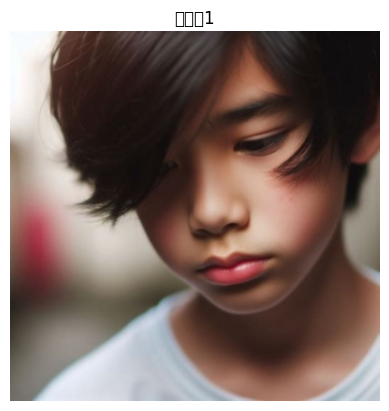

Predicted Emotion: sad


In [90]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# 파일 업로드
uploaded = files.upload()  # 사용자가 파일 업로드
test_image_path = list(uploaded.keys())[0]  # 첫 번째 업로드된 파일 이름 가져오기

# 이미지 열기
img = Image.open(test_image_path)

# 이미지 보기
plt.imshow(img)
plt.axis("off")  # 축 제거
plt.title("테스트1")  # 제목
plt.show()

# 사용자 이미지 테스트 함수 호출
test_custom_image(test_image_path)

Saving 2.jpg to 2.jpg


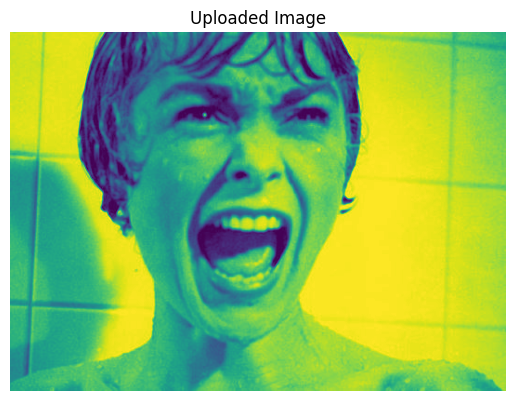

Predicted Emotion: angry


In [91]:
# 파일 업로드
uploaded = files.upload()  # 사용자가 파일 업로드
test_image_path = list(uploaded.keys())[0]  # 첫 번째 업로드된 파일 이름 가져오기

# 이미지 열기
img = Image.open(test_image_path)

# 이미지 보기
plt.imshow(img)
plt.axis("off")  # 축 제거
plt.title("테스트2")  # 제목
plt.show()

# 사용자 이미지 테스트 함수 호출
test_custom_image(test_image_path)

Saving 3.jpg to 3.jpg


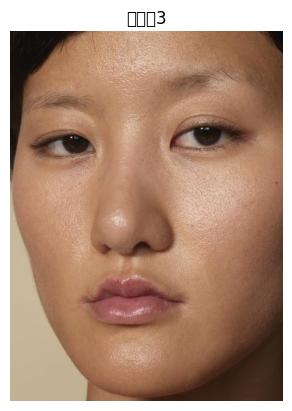

Predicted Emotion: sad


In [92]:
# 파일 업로드
uploaded = files.upload()  # 사용자가 파일 업로드
test_image_path = list(uploaded.keys())[0]  # 첫 번째 업로드된 파일 이름 가져오기

# 이미지 열기
img = Image.open(test_image_path)

# 이미지 보기
plt.imshow(img)
plt.axis("off")  # 축 제거
plt.title("테스트3")  # 제목
plt.show()

# 사용자 이미지 테스트 함수 호출
test_custom_image(test_image_path)

Saving 4.jpg to 4 (3).jpg


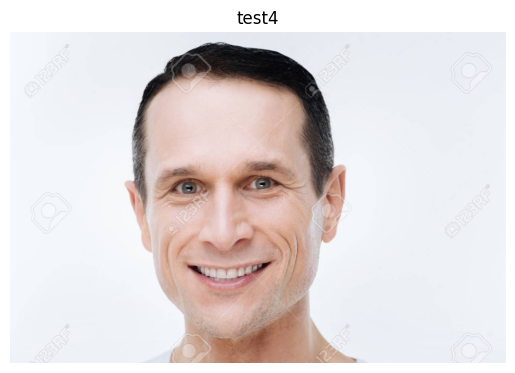

Predicted Emotion: surprised


In [97]:
# 파일 업로드
uploaded = files.upload()  # 사용자가 파일 업로드
test_image_path = list(uploaded.keys())[0]  # 첫 번째 업로드된 파일 이름 가져오기

# 이미지 열기
img = Image.open(test_image_path)

# 이미지 보기
plt.imshow(img)
plt.axis("off")  # 축 제거
plt.title("test4")  # 제목
plt.show()

# 사용자 이미지 테스트 함수 호출
test_custom_image(test_image_path)

Saving 5.jpg to 5 (15).jpg


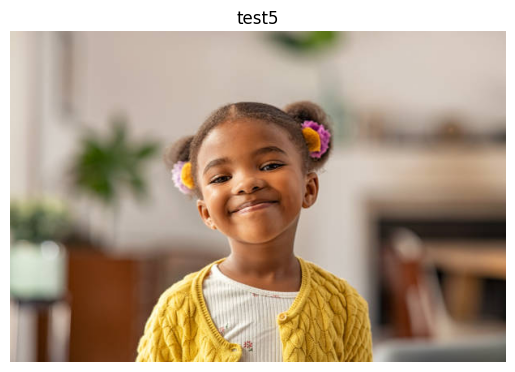

Predicted Emotion: happy


In [130]:
# 파일 업로드
uploaded = files.upload()  # 사용자가 파일 업로드
test_image_path = list(uploaded.keys())[0]  # 첫 번째 업로드된 파일 이름 가져오기

# 이미지 열기
img = Image.open(test_image_path)

# 이미지 보기
plt.imshow(img)
plt.axis("off")  # 축 제거
plt.title("test5")  # 제목
plt.show()

# 사용자 이미지 테스트 함수 호출
test_custom_image(test_image_path)

Saving 6.jpg to 6 (1).jpg


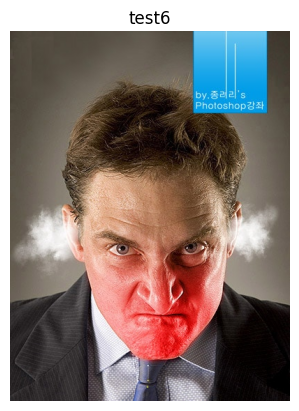

Predicted Emotion: angry


In [101]:
# 파일 업로드
uploaded = files.upload()  # 사용자가 파일 업로드
test_image_path = list(uploaded.keys())[0]  # 첫 번째 업로드된 파일 이름 가져오기

# 이미지 열기
img = Image.open(test_image_path)

# 이미지 보기
plt.imshow(img)
plt.axis("off")  # 축 제거
plt.title("test6")  # 제목
plt.show()

# 사용자 이미지 테스트 함수 호출
test_custom_image(test_image_path)